<a href="https://colab.research.google.com/github/ChitteshKumar/udemy_deep_learning_tutorials/blob/main/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###RNN for Time Series Prediction

In [ ]:
# !pip install -q tensorflow-gpu==2.0.0-betal

In [ ]:
#all the imports
from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

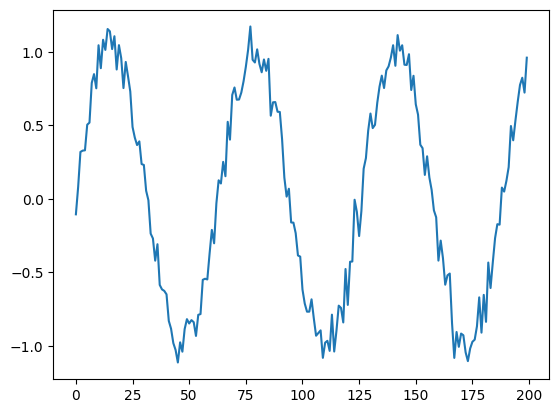

In [ ]:
#make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

#plotting
plt.plot(series)
plt.show()

In [ ]:
#building dataset
T = 10
D = 1
X = []
Y = []
for time in range(len(series) - T):
  x = series[time : time+T]
  X.append(x)
  y = series[time+T]
  Y.append(y)

X = np.array(X).reshape(-1,T,1) #for RNN, shape is NxTxD
Y = np.array(Y)
N = len(X)
print("X.shape" , X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [ ]:
#RNN Model
input = Input(shape=(T,1))
output = SimpleRNN(5)(input) #output = SimpleRNN(5, activation='relu')(input); default activation func is tanh
output = Dense(1)(output)
model = Model(input, output)
model.compile(loss = 'mse', optimizer=Adam(learning_rate=0.1))

#training the model
r = model.fit(
    X[:-N//2], Y[:-N//2], epochs = 80, validation_data = (X[-N//2 :], Y[-N//2 :]),
)

Epoch 1/80
3/3 [==============================] - 5s 403ms/step - loss: 0.1495 - val_loss: 0.0882
Epoch 2/80
3/3 [==============================] - 0s 26ms/step - loss: 0.0702 - val_loss: 0.0390
Epoch 3/80
3/3 [==============================] - 0s 73ms/step - loss: 0.0315 - val_loss: 0.0624
Epoch 4/80
3/3 [==============================] - 0s 60ms/step - loss: 0.0471 - val_loss: 0.0385
Epoch 5/80
3/3 [==============================] - 0s 45ms/step - loss: 0.0295 - val_loss: 0.0321
Epoch 6/80
3/3 [==============================] - 0s 34ms/step - loss: 0.0277 - val_loss: 0.0396
Epoch 7/80
3/3 [==============================] - 0s 64ms/step - loss: 0.0265 - val_loss: 0.0249
Epoch 8/80
3/3 [==============================] - 0s 66ms/step - loss: 0.0287 - val_loss: 0.0313
Epoch 9/80
3/3 [==============================] - 0s 58ms/step - loss: 0.0234 - val_loss: 0.0283
Epoch 10/80
3/3 [==============================] - 0s 30ms/step - loss: 0.0204 - val_loss: 0.0260
Epoch 11/80
3/3 [===========

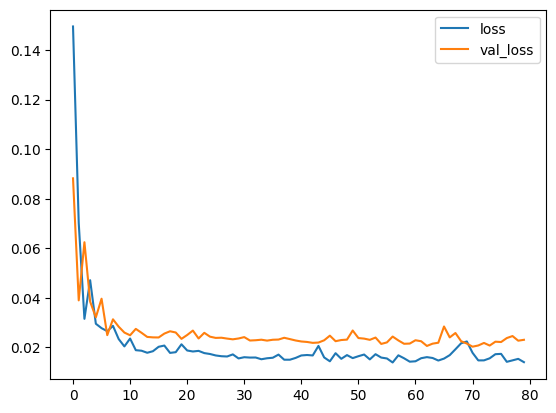

In [ ]:
#plot
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
#wrong forecast using true targets - one step forecast
validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,-1,1))[0,0]
  i += 1
  validation_predictions.append(p)


1/1 [==============================] - 0s 18ms/step


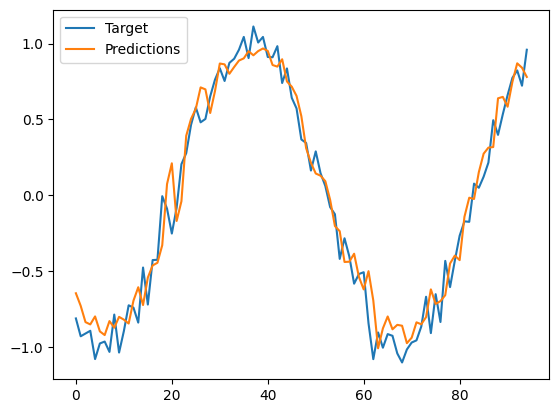

In [ ]:
#plotting predictions
plt.plot(validation_target, label='Target')
plt.plot(validation_predictions, label = 'Predictions')
plt.legend()

In [ ]:
#multi-step forecast - future predictions
validation_target = Y[-N//2 :]
validation_predictions = []

last_x = X[-N//2]

while len(validation_target) > len(validation_predictions):
  p = model.predict(last_x.reshape(1,-1,1))[0,0]
  validation_predictions.append(p)
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

1/1 [==============================] - 0s 23ms/step


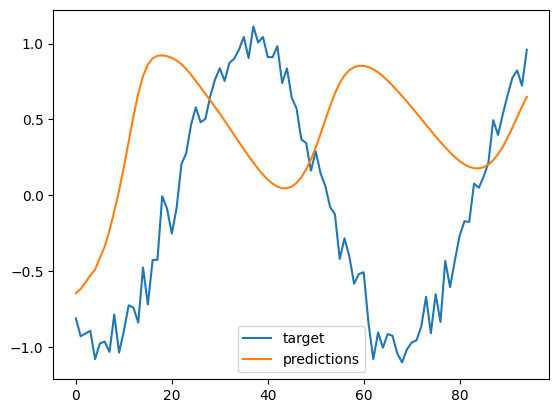

In [ ]:
plt.plot(validation_target, label='target')
plt.plot(validation_predictions, label='predictions')
plt.legend()

## Shapes in RNN

In [ ]:
N = 2
T = 10
D = 3
K =2
M = 5
X = np.random.randn(N,T,D)

In [ ]:
i = Input(shape=(T,D))
x = SimpleRNN(M)(i)
x = Dense(K)(x)

model = Model(i,x)
Yhat = model.predict(X)
print(Yhat)

1/1 [==============================] - 0s 141ms/step
[[-0.23546372 -1.2033216 ]
 [ 0.5114629  -0.39060748]]


In [ ]:
# to get information about layers
model.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 10, 3)]           0         
                                                                 
 simple_rnn_7 (SimpleRNN)    (None, 5)                 45        
                                                                 
 dense_7 (Dense)             (None, 2)                 12        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________


In [ ]:
a,b,c = model.layers[1].get_weights()
print(a.shape, b.shape, c.shape)

(3, 5) (5, 5) (5,)


In [ ]:
#Manual calculation of the prediction

Wi, Wh, bh = model.layers[1].get_weights()
Wo, bo = model.layers[2].get_weights()

last_h = np.zeros(M)
x = X[0]
Yhats=[]

for i in range(T):
  h = np.tanh(x[i].dot(Wi) + last_h.dot(Wh)+bh)
  y = h.dot(Wo) + bo

  Yhats.append(y)
  last_h = h

print(Yhats[-1])

#method-1
# #Manual calculation of the prediction - multiple samples (N>1)

# Wi, Wh, bh = model.layers[1].get_weights()
# Wo, bo = model.layers[2].get_weights()

# print(Wi.shape)
# print(X.shape)

# last_h = np.zeros(M)
# x = X[1]
# Yhats=[]
# # print(X)

# for i in range(T):
#   # h = np.tanh(X[0].reshape(1,1,-1).dot(Wi) + last_h.dot(Wh)+bh)
#   print(x[i].shape)

# #   y = h.dot(Wo) + bo

# #   Yhats.append(y)

# #   last_h = h

# # print(Yhats[-1])

#method-2
#Manual calculation of the prediction - multiple samples

Wi, Wh, bh = model.layers[1].get_weights()
Wo, bo = model.layers[2].get_weights()

last_h1 = np.zeros(M)
x1 = X[0]
Yhats1=[]
Yhats2=[]

for i in range(T):
  h1 = np.tanh(x1[i].dot(Wi) + last_h1.dot(Wh)+bh)
  y1 = h1.dot(Wo) + bo

  Yhats1.append(y1)
  last_h1 = h1

# print(np.array(Yhats[-1]))
last_h2 = np.zeros(M)
x2 = X[1]
Yhats=[]

for i in range(T):
  h2 = np.tanh(x2[i].dot(Wi) + last_h2.dot(Wh)+bh)
  y2 = h2.dot(Wo) + bo

  Yhats2.append(y2)
  last_h2 = h2

print((np.array(Yhats1[-1]), np.array(Yhats2[-1])))

[-0.23546363 -1.20332161]
(array([-0.23546363, -1.20332161]), array([ 0.51146293, -0.39060737]))
